In [ ]:
sequence = "ATGACCATGATTACGGATTCAAGGCTCCCGGCTTCGTGACCTGGATCTGCTGAGCGAAAGTTCGCTTCTGGGCTGCTGACCGCTTCTCGATGGCCGCCATGACCTACGACGATGTACGACCAAGATGGACGCCGGTCGATCTGGACTACGACGATGACCTGACCGTGGCCGATCAGCGGACCTGGAGGAGGCGATGAGTTCGAGTACGCTGAGTTCGACCGCTTCTTCAGCGGCGATCAGGCTTCGATGACCTACGAGATGGCGGATCTTCAGGATCGTGTCAGCGTCTTCGGAGCAGCT"
amino_acids_dict = {
    "F": ["TTT", "TTC"],
    "L": ["TTA", "TTG", "CTT", "CTC", "CTA", "CTG"],
    "I": ["ATT", "ATC", "ATA"],
    "M": ["ATG"],
    "V": ["GTT", "GTC", "GTA", "GTG"],
    "S": ["TCT", "TCC", "TCA", "TCG", "AGT", "AGC"],
    "P": ["CCT", "CCC", "CCA", "CCG"],
    "T": ["ACT", "ACC", "ACA", "ACG"],
    "A": ["GCT", "GCC", "GCA", "GCG"],
    "Y": ["TAT", "TAC"],
    "*": ["TAA", "TAG", "TGA"],
    "H": ["CAT", "CAC"],
    "Q": ["CAA", "CAG"],
    "N": ["AAT", "AAC"],
    "K": ["AAA", "AAG"],
    "D": ["GAT", "GAC"],
    "E": ["GAA", "GAG"],
    "C": ["TGT", "TGC"],
    "W": ["TGG"],
    "R": ["CGT", "CGC", "CGA", "CGG", "AGA", "AGG"],
    "G": ["GGT", "GGC", "GGA", "GGG"]
}
def DNA_to_Protein(sequence):
  codons=[]
  amino_acid=[]
  for i in range(0, len(sequence),3):
    codon = sequence[i:i+3]
    codons.append(codon)
    for i, x in amino_acids_dict.items():
      if codon in x:
        amino_acid.append(i)
  return codons, amino_acid
cod_list, amin_list = DNA_to_Protein(sequence)
print(cod_list)
print("The Protien Sequence is","".join(amin_list))



['ATG', 'ACC', 'ATG', 'ATT', 'ACG', 'GAT', 'TCA', 'AGG', 'CTC', 'CCG', 'GCT', 'TCG', 'TGA', 'CCT', 'GGA', 'TCT', 'GCT', 'GAG', 'CGA', 'AAG', 'TTC', 'GCT', 'TCT', 'GGG', 'CTG', 'CTG', 'ACC', 'GCT', 'TCT', 'CGA', 'TGG', 'CCG', 'CCA', 'TGA', 'CCT', 'ACG', 'ACG', 'ATG', 'TAC', 'GAC', 'CAA', 'GAT', 'GGA', 'CGC', 'CGG', 'TCG', 'ATC', 'TGG', 'ACT', 'ACG', 'ACG', 'ATG', 'ACC', 'TGA', 'CCG', 'TGG', 'CCG', 'ATC', 'AGC', 'GGA', 'CCT', 'GGA', 'GGA', 'GGC', 'GAT', 'GAG', 'TTC', 'GAG', 'TAC', 'GCT', 'GAG', 'TTC', 'GAC', 'CGC', 'TTC', 'TTC', 'AGC', 'GGC', 'GAT', 'CAG', 'GCT', 'TCG', 'ATG', 'ACC', 'TAC', 'GAG', 'ATG', 'GCG', 'GAT', 'CTT', 'CAG', 'GAT', 'CGT', 'GTC', 'AGC', 'GTC', 'TTC', 'GGA', 'GCA', 'GCT']
The Protien Sequence is MTMITDSRLPAS*PGSAERKFASGLLTASRWPP*PTTMYDQDGRRSIWTTTMT*PWPISGPGGGDEFEYAEFDRFFSGDQASMTYEMADLQDRVSVFGAA


In [ ]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 20.6 MB/s eta 0:00:00


In [ ]:
from Bio.Seq import Seq
seq = Seq(sequence)
print(f" The RNA Sequence is: {seq.transcribe()}")
print(f"The Protien Sequence is: {seq.transcribe().translate()}")

 The RNA Sequence is: AUGACCAUGAUUACGGAUUCAAGGCUCCCGGCUUCGUGACCUGGAUCUGCUGAGCGAAAGUUCGCUUCUGGGCUGCUGACCGCUUCUCGAUGGCCGCCAUGACCUACGACGAUGUACGACCAAGAUGGACGCCGGUCGAUCUGGACUACGACGAUGACCUGACCGUGGCCGAUCAGCGGACCUGGAGGAGGCGAUGAGUUCGAGUACGCUGAGUUCGACCGCUUCUUCAGCGGCGAUCAGGCUUCGAUGACCUACGAGAUGGCGGAUCUUCAGGAUCGUGUCAGCGUCUUCGGAGCAGCU
The Protien Sequence is: MTMITDSRLPAS*PGSAERKFASGLLTASRWPP*PTTMYDQDGRRSIWTTTMT*PWPISGPGGGDEFEYAEFDRFFSGDQASMTYEMADLQDRVSVFGAA


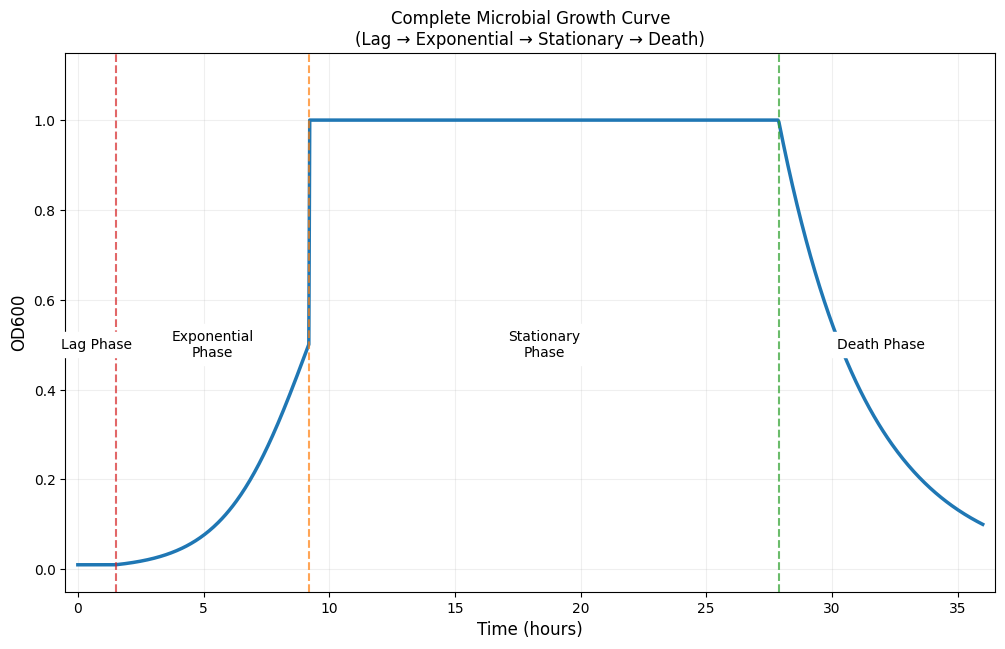

In [ ]:
simport numpy as np
import matplotlib.pyplot as plt

def logistic_growth_with_phases(
    time_max=36,          # Total simulation time (hours)
    N0=0.01,             # Initial population (OD600)
    K=1.0,               # Carrying capacity (max OD600)
    lag_phase_range=(0, 4),      # Min/max lag phase duration
    exp_phase_range=(2, 8),      # Min/max exponential phase duration
    death_phase_range=(3, 10),   # Min/max death phase duration
    resolution=1000,     # Number of time points
    decay_fraction=0.1   #Fraction of K remaining after death phase
):
    """
    Generates a microbial growth curve with four phases and randomized durations.
    Returns time array, population array, and phase durations.
    """
    # Randomize phase durations
    lag_duration = np.random.uniform(*lag_phase_range)
    exp_duration = np.random.uniform(*exp_phase_range)

    # Calculate available time for stationary+death phases
    remaining_time = time_max - (lag_duration + exp_duration)
    remaining_time = max(remaining_time, 0)

    # Randomize death phase duration (clamped to remaining time)
    death_duration = np.random.uniform(*death_phase_range)
    death_duration = min(max(death_duration, 0), remaining_time)
    stationary_duration = remaining_time - death_duration

    # Calculate growth/death rates
    r = np.log(100) / exp_duration  # Growth rate
    d = -np.log(decay_fraction)/death_duration if death_duration > 0 else 0

    # Create time array
    t = np.linspace(0, time_max, resolution)
    population = np.zeros_like(t)

    # Phase transition points
    exp_end = lag_duration + exp_duration
    death_start = exp_end + stationary_duration

    for i, time in enumerate(t):
        if time < lag_duration:  # Lag phase
            population[i] = N0
        elif time < exp_end:     # Exponential phase
            adjusted_time = time - lag_duration
            population[i] = K / (1 + (K-N0)/N0 * np.exp(-r*adjusted_time))
        elif time < death_start: # Stationary phase
            population[i] = K
        else:                    # Death phase
            if death_duration > 0:
                t_death = time - death_start
                population[i] = K * np.exp(-d * t_death)
            else:
                population[i] = K

    return t, population, (lag_duration, exp_duration, stationary_duration, death_duration)

# Example usage and visualization
np.random.seed(42)
time, population, phases = logistic_growth_with_phases(time_max=36)
lag, exp, stationary, death = phases

plt.figure(figsize=(12, 7))
plt.plot(time, population, lw=2.5, color='#1f77b4')
plt.title("Complete Microbial Growth Curve\n(Lag → Exponential → Stationary → Death)")
plt.xlabel("Time (hours)", fontsize=12)
plt.ylabel("OD600", fontsize=12)
plt.grid(alpha=0.2)

# Phase annotations
phase_colors = ['#d62728', '#ff7f0e', '#2ca02c', '#9467bd']
plt.axvline(lag, color=phase_colors[0], linestyle='--', alpha=0.7)
plt.axvline(lag+exp, color=phase_colors[1], linestyle='--', alpha=0.7)
plt.axvline(lag+exp+stationary, color=phase_colors[2], linestyle='--', alpha=0.7)

phase_labels = [
    (lag/2, 'Lag Phase'),
    (lag + exp/2, 'Exponential\nPhase'),
    (lag + exp + stationary/2, 'Stationary\nPhase'),
    (lag + exp + stationary + death/2, 'Death Phase')
]

for xpos, label in phase_labels:
    plt.text(xpos, 0.5, label, ha='center', va='center',
            fontsize=10, backgroundcolor='white')

plt.ylim(-0.05, 1.15)
plt.xlim(-0.5, max(time)+0.5)
plt.show()

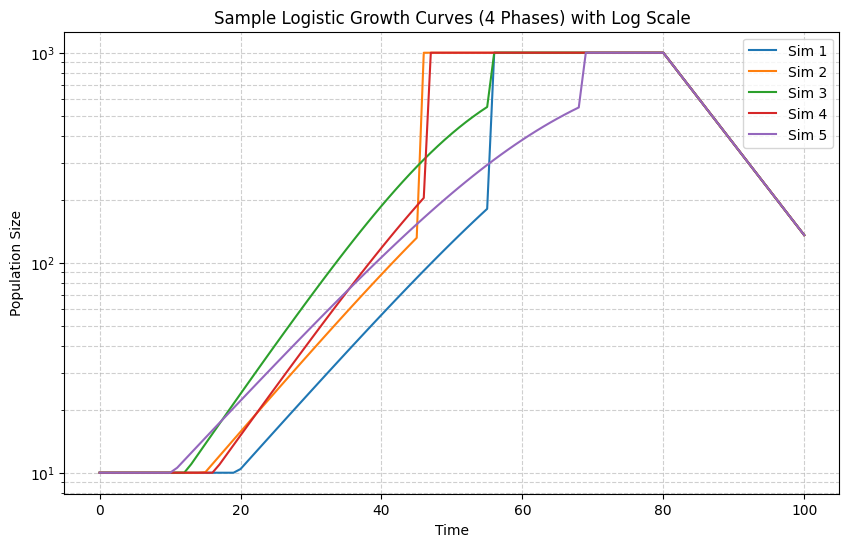

In [ ]:
import math
import random
import pandas as pd
import matplotlib.pyplot as plt

def simulate_full_growth(time_end=100, dt=0.5, K=1000, r=0.1, N0=10,
                         lag_range=(10, 20), exp_range=(40, 80),
                         death_phase_fraction=0.8, death_rate=0.1):

    # Randomized parameters
    lag_time = random.uniform(*lag_range)
    exp_duration = random.uniform(*exp_range)
    # The exponential phase ends at:
    t_exponential_end = lag_time + exp_duration

    # Dead phase starts at:
    t_death_start = death_phase_fraction * time_end

    # Parameter for logistic growth
    A = (K - N0) / N0
    r_adj = r * random.uniform(0.8, 1.2)

    times = []
    pops = []

    current_time = 0.0
    while current_time <= time_end:
        times.append(current_time)
        # Phase 1: Lag phase
        if current_time < lag_time:
            pop = N0
        # Phase 2: Exponential (log) phase:
        elif lag_time <= current_time < t_exponential_end:
            pop = K / (1 + A * math.exp(-r_adj * (current_time - lag_time)))
        # Phase 3: Stationary phase
        elif t_exponential_end <= current_time < t_death_start:
            pop = K
        # Phase 4: Dead phase (decline)
        else:
            pop = K * math.exp(-death_rate * (current_time - t_death_start))

        pops.append(pop)
        current_time += dt

    params = {
        'lag_time': lag_time,
        'exp_duration': exp_duration,
        't_exponential_end': t_exponential_end,
        't_death_start': t_death_start,
        'r_adj': r_adj,
        'death_rate': death_rate
    }
    return times, pops, params

def generate_growth_curves(n_curves=100, **kwargs):

    all_data = []
    for sim_id in range(1, n_curves + 1):
        times, pops, params = simulate_full_growth(**kwargs)
        for t_val, pop_val in zip(times, pops):
            all_data.append({
                'sim_id': sim_id,
                'time': t_val,
                'population': pop_val,
                'lag_time': params['lag_time'],
                'exp_duration': params['exp_duration'],
                'r_adj': params['r_adj'],
                't_death_start': params['t_death_start'],
                'death_rate': params['death_rate']
            })
    df = pd.DataFrame(all_data)
    return df

# Generate a DataFrame with 100 growth curves
df_growth = generate_growth_curves(
    n_curves=100,
    time_end=100,
    dt=1,
    K=1000,
    r=0.1,
    N0=10,
    lag_range=(10, 20),
    exp_range=(20, 60),
    death_phase_fraction=0.8,
    death_rate=0.1
)

# (Optional) Plot a few example curves with logarithmic y-axis:
plt.figure(figsize=(10, 6))
for sim_id in sorted(df_growth['sim_id'].unique())[:5]:
    subset = df_growth[df_growth['sim_id'] == sim_id]
    plt.plot(subset['time'], subset['population'], label=f"Sim {sim_id}")
plt.xlabel("Time")
plt.ylabel("Population Size")
plt.title("Sample Logistic Growth Curves (4 Phases) with Log Scale")
plt.yscale('log')  # Convert the y-axis to logarithmic scale
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.show()


In [ ]:
def find_nearest(target, numbers):
    """
    Returns the number from the list 'numbers' that is closest to the 'target'.

    Parameters:
        target (float): The number to compare against.
        numbers (list of float): The list of numbers to search.

    Returns:
        float: The number in the list that is nearest to the target.
    """
    return min(numbers, key=lambda x: abs(x - target))

# Example usage:
target = df_growth['population'].max()*0.8
nearest = find_nearest(target, df_growth['population'])
print(f"The number closest to {target} is {nearest}.")
df_growth[df_growth['population'] == nearest]['time']
print(f"The time when the growth reaches 80% is {nearest}")

The number closest to 800.0 is 799.8539254776367.
The time when the growth reaches 80% is 799.8539254776367


In [ ]:
string1 = "ANDIRFIGOEWREDROFlkjhgfcdesisa"
string2 = "AERTHJHGWSDFGBHNBuiwy itehrejowerewqewserg"

def hamming_distance(string1, string2):
  string1 = string1.upper()
  string2 = string2.upper()
  max_length = max(len(string1), len(string2))
  string1 = string1.ljust(max_length, " ")
  string2 = string2.ljust(max_length, " ")
  score = 0
  for index, character in enumerate(string1):
    if character == string2[index]:
      print(f"Match at index {index}: {character}")
      score += 1
    else:
      print(f"No Match at index {index}: {character}")
  print(f"The score is {score}")
  return score, string1, string2

hamming_distance(string1, string2)

Match at index 0: A
No Match at index 1: N
No Match at index 2: D
No Match at index 3: I
No Match at index 4: R
No Match at index 5: F
No Match at index 6: I
Match at index 7: G
No Match at index 8: O
No Match at index 9: E
No Match at index 10: W
No Match at index 11: R
No Match at index 12: E
No Match at index 13: D
No Match at index 14: R
No Match at index 15: O
No Match at index 16: F
No Match at index 17: L
No Match at index 18: K
No Match at index 19: J
No Match at index 20: H
No Match at index 21: G
No Match at index 22: F
No Match at index 23: C
No Match at index 24: D
No Match at index 25: E
No Match at index 26: S
No Match at index 27: I
No Match at index 28: S
No Match at index 29: A
No Match at index 30:  
No Match at index 31:  
No Match at index 32:  
No Match at index 33:  
No Match at index 34:  
No Match at index 35:  
No Match at index 36:  
No Match at index 37:  
No Match at index 38:  
No Match at index 39:  
No Match at index 40:  
No Match at index 41:  
The scor

(2,
 'ANDIRFIGOEWREDROFLKJHGFCDESISA            ',
 'AERTHJHGWSDFGBHNBUIWY ITEHREJOWEREWQEWSERG')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
df_link = 'https://raw.githubusercontent.com/HackBio-Internship/2025_project_collection/refs/heads/main/Python/Dataset/cpg_methylation_age_data.csv'
df = pd.read_csv(df_link)
df.head()

X=df.drop(columns=['Age'])
y=df['Age']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=100, step=10)
rfe.fit(x_train, y_train)

# Get the selected features
selected_features = x_train.columns[rfe.support_]
X_train_selected = x_train[selected_features]
X_test_selected = x_test[selected_features]

print(f"Selected features: {selected_features}")

Selected features: Index(['CpG_1', 'CpG_2', 'CpG_3', 'CpG_5', 'CpG_6', 'CpG_7', 'CpG_9', 'CpG_12',
       'CpG_13', 'CpG_15', 'CpG_18', 'CpG_22', 'CpG_23', 'CpG_36', 'CpG_38',
       'CpG_39', 'CpG_41', 'CpG_42', 'CpG_43', 'CpG_45', 'CpG_46', 'CpG_48',
       'CpG_50', 'CpG_51', 'CpG_54', 'CpG_55', 'CpG_56', 'CpG_62', 'CpG_63',
       'CpG_64', 'CpG_65', 'CpG_68', 'CpG_69', 'CpG_72', 'CpG_73', 'CpG_74',
       'CpG_76', 'CpG_77', 'CpG_81', 'CpG_83', 'CpG_84', 'CpG_87', 'CpG_88',
       'CpG_91', 'CpG_92', 'CpG_93', 'CpG_95', 'CpG_96', 'CpG_97', 'CpG_99',
       'CpG_100', 'CpG_101', 'CpG_103', 'CpG_106', 'CpG_107', 'CpG_108',
       'CpG_110', 'CpG_112', 'CpG_114', 'CpG_119', 'CpG_120', 'CpG_121',
       'CpG_128', 'CpG_131', 'CpG_132', 'CpG_133', 'CpG_135', 'CpG_138',
       'CpG_139', 'CpG_143', 'CpG_146', 'CpG_152', 'CpG_154', 'CpG_155',
       'CpG_157', 'CpG_159', 'CpG_160', 'CpG_162', 'CpG_163', 'CpG_165',
       'CpG_166', 'CpG_167', 'CpG_168', 'CpG_169', 'CpG_170', 'CpG_171',
 